# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
rocket = pd.read_csv('data/RocketLaunchDataCSV.csv')
rocket.head(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN


# 데이터 탐색 및 전처리

In [3]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

## 자료형 변환

In [4]:
# rocket['Sea Level Pressure'].astype('float') 
# 변환할 수 없는 값은 null처리
rocket['Sea Level Pressure'] = pd.to_numeric(rocket['Sea Level Pressure'], errors='coerce')
rocket['Sea Level Pressure'].head(3)

0    30.22
1    30.20
2    30.25
Name: Sea Level Pressure, dtype: float64

In [5]:
def time_to_decimal(time_str):
    try:
        # 시간과 분을 분리
        hours, minutes = map(int, time_str.split(':'))
        # 24시간 기준으로 소수점 변환 (시간 + 분/60)
        return hours + minutes/60
    except:
        return None

# 컬럼에 적용
rocket['Day Length'] = rocket['Day Length'].apply(time_to_decimal)

# 확인
print("변환된 값 샘플:", rocket['Day Length'].head())
print("데이터 타입:", rocket['Day Length'].dtype)

변환된 값 샘플: 0    10.433333
1    10.433333
2    10.416667
3    10.416667
4    12.400000
Name: Day Length, dtype: float64
데이터 타입: float64


## object 타입인 변수의 데이터 분포 확인

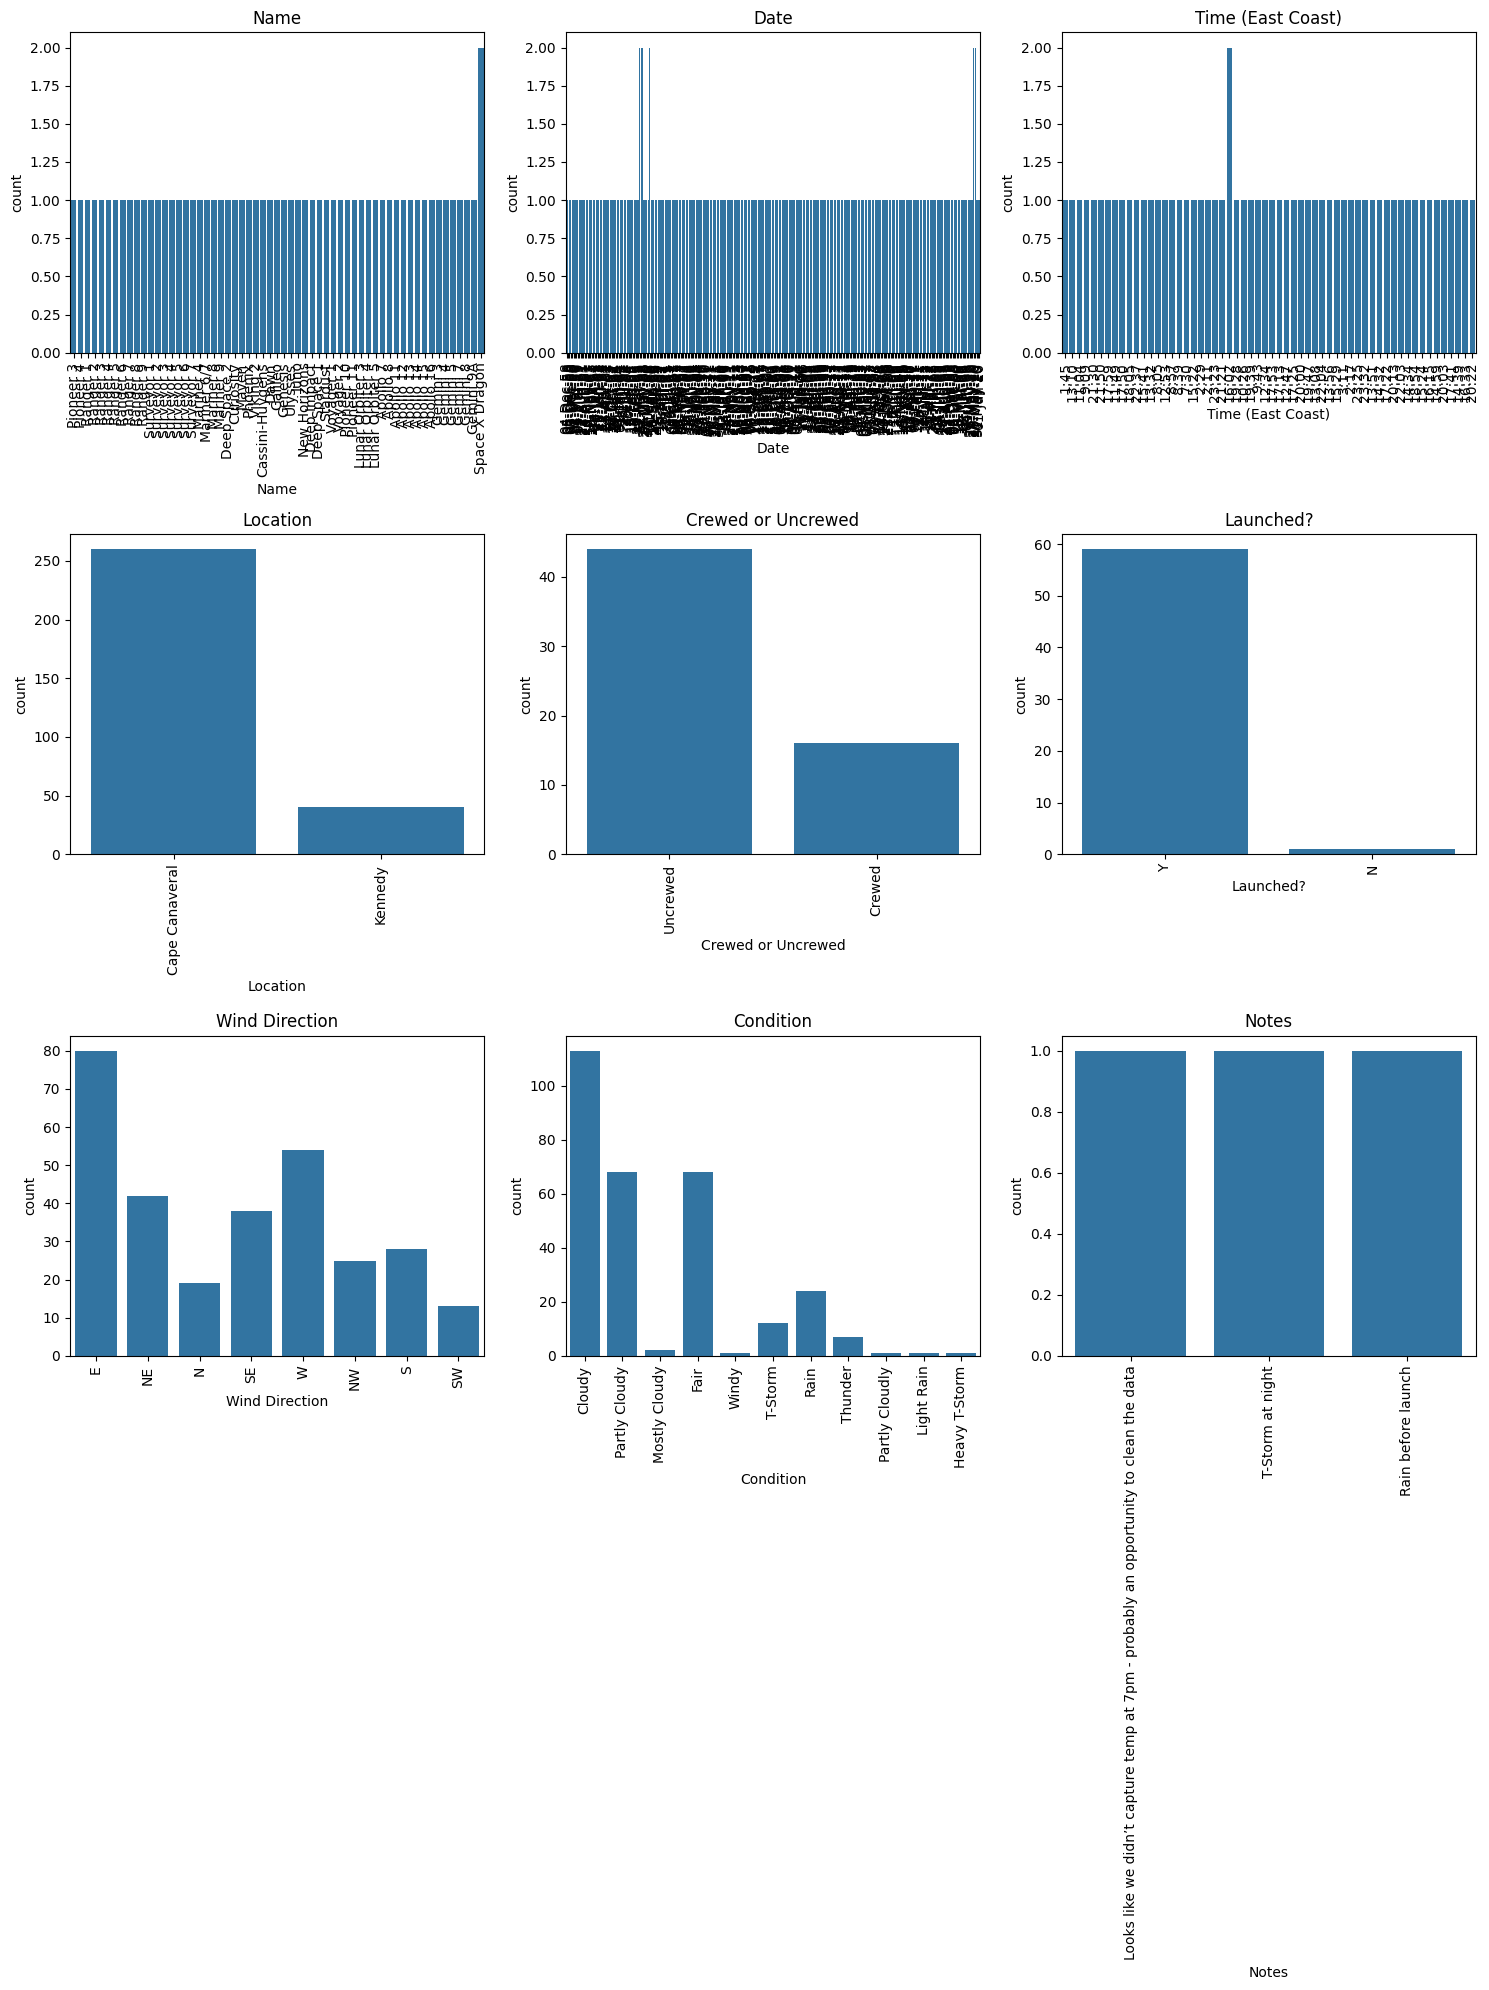

In [6]:
# 데이터타입이 object인 컬럼 추출출
object_cols = rocket.select_dtypes(include=['object']).columns
object_cols

# 데이터 분포 확인
plt.figure(figsize=(15,20))
i = 1
for col in object_cols:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## float 타입인 데이터의 분포 확인

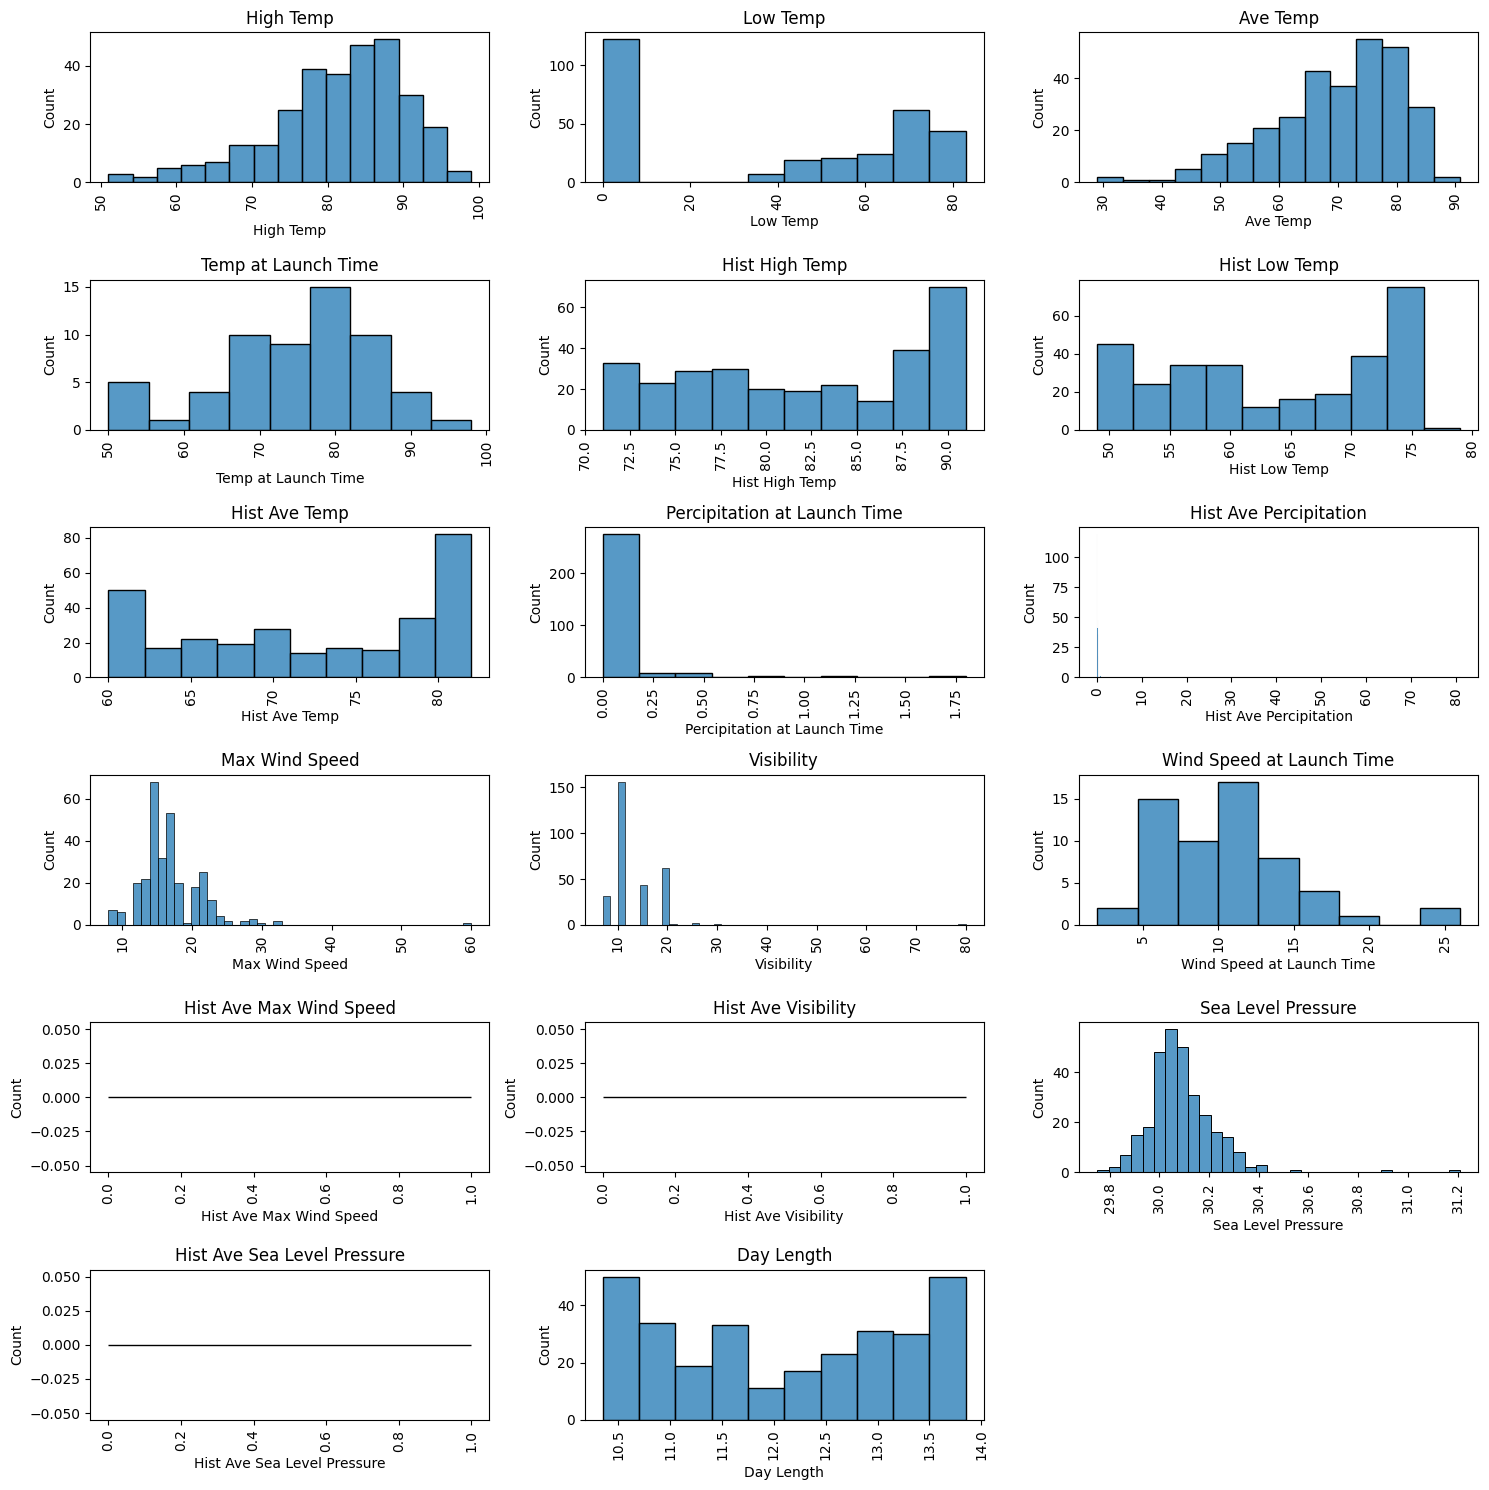

In [7]:
# 데이터타입이 float인 컬럼 추출
numeric_cols = rocket.select_dtypes(include=['int','float']).columns
numeric_cols

# 데이터 분포 확인
plt.figure(figsize=(15,15))
i = 1
for col in numeric_cols:
    plt.subplot(6,3,i)
    i+=1
    sns.histplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## 데이터 전처리

### 불필요한 컬럼 제거

In [8]:
# 사용하지 않을 컬럼

del_cols = ['Name', 'Date', 'Time (East Coast)','Notes',\
            'Percipitation at Launch Time', 'Hist Ave Percipitation',\
            'Hist Ave Max Wind Speed', 'Hist Ave Visibility','Hist Ave Sea Level Pressure']
df = rocket.drop(columns = del_cols)
df.head()

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,E,16.0,15.0,NaN,30.22,10.433333,Cloudy
1,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,E,14.0,10.0,NaN,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,NE,15.0,10.0,11.0,30.25,10.416667,Cloudy
3,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,N,10.0,10.0,NaN,30.28,10.416667,Partly Cloudy
4,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,E,12.0,10.0,NaN,30.23,12.400000,Partly Cloudy


### 결측치 확인 및 처리

In [9]:
df.isnull().sum()

Location                       0
Crewed or Uncrewed           240
Launched?                    240
High Temp                      1
Low Temp                       1
Ave Temp                       1
Temp at Launch Time          241
Hist High Temp                 1
Hist Low Temp                  1
Hist Ave Temp                  1
Wind Direction                 1
Max Wind Speed                 1
Visibility                     1
Wind Speed at Launch Time    241
Sea Level Pressure             2
Day Length                     2
Condition                      2
dtype: int64

In [10]:
# Crewed or Uncrewed --> 'Uncrewed'로 채우기
df['Crewed or Uncrewed'] = df['Crewed or Uncrewed'].fillna('Uncrewed')

# Launched? --> 'N'으로 채우기
df['Launched?'] = df['Launched?'].fillna('N')

In [11]:
# object타입 변수의 결측값 채우기 (최빈값으로 채우기)
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])

In [12]:
# 수치형 타입 변수의 결측값 채우기 (평균값으로 채우기)
# Numeric인 int, float 칼럼 불러오기
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# 평균값으로 채우기
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [13]:
df.isnull().sum()

Location                     0
Crewed or Uncrewed           0
Launched?                    0
High Temp                    0
Low Temp                     0
Ave Temp                     0
Temp at Launch Time          0
Hist High Temp               0
Hist Low Temp                0
Hist Ave Temp                0
Wind Direction               0
Max Wind Speed               0
Visibility                   0
Wind Speed at Launch Time    0
Sea Level Pressure           0
Day Length                   0
Condition                    0
dtype: int64

## 독립변수와 종속변수의 관계

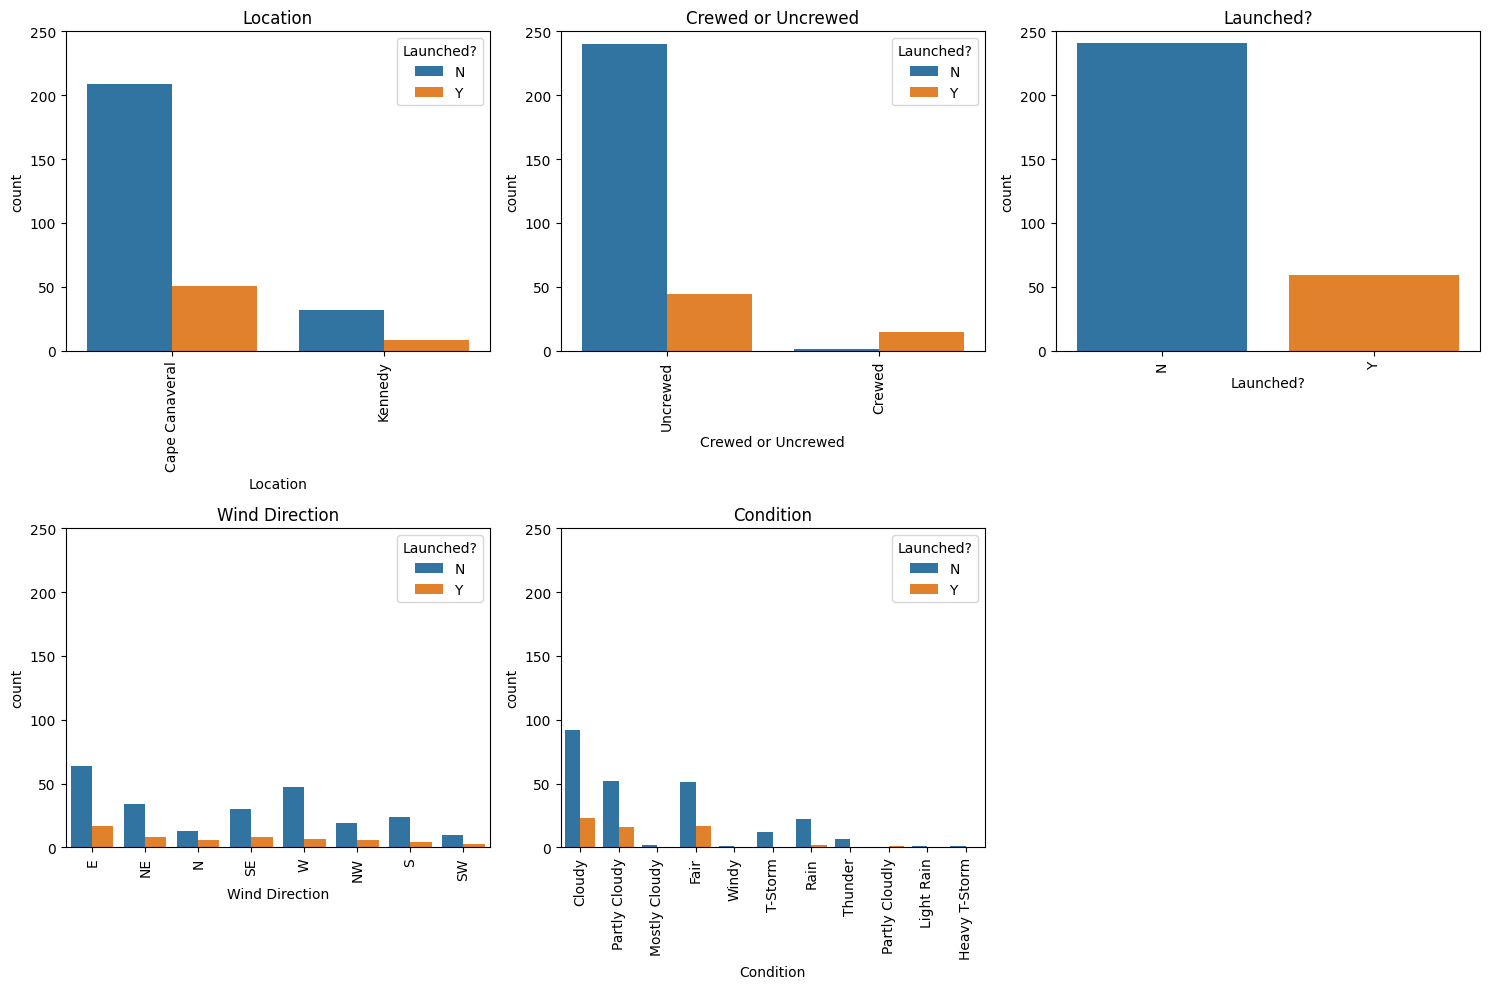

In [14]:
# 범주형 변수
#df['Location']

#크기 조정
plt.figure(figsize=(15, 10))
i = 1
for col in obj_cols:
    # 2행 3열에 i번째 데이터터
    plt.subplot(2, 3, i)
    i = i+1
    sns.countplot(data=df, x=col, hue = 'Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0, 250)
plt.tight_layout()


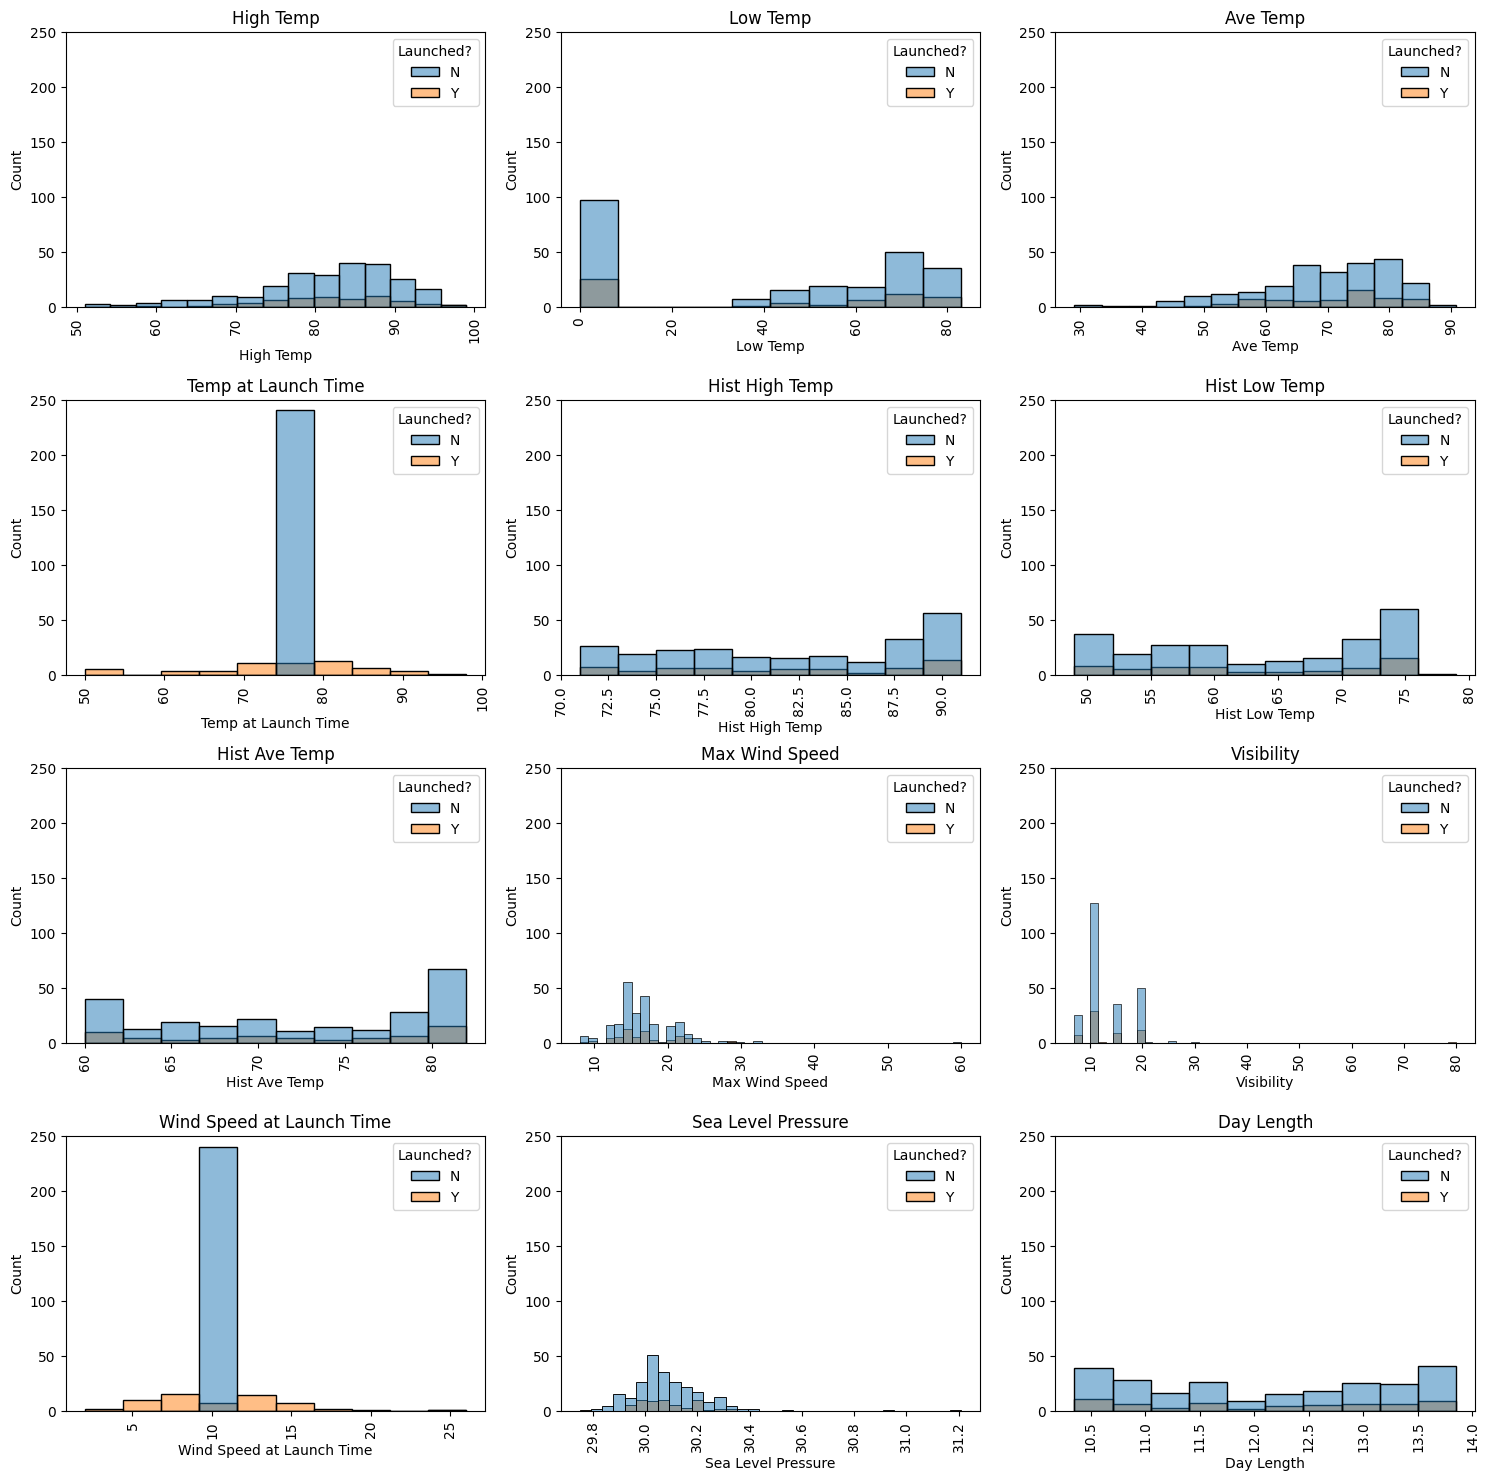

In [15]:
# 수치형형 변수


#크기 조정
plt.figure(figsize=(15, 15))
i = 1
for col in numeric_cols:
    # 2행 3열에 i번째 데이터터
    plt.subplot(4, 3, i)
    i = i+1
    sns.histplot(data=df, x=col, hue = 'Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0, 250)
plt.tight_layout()

# 변수 선택

## 후진 선택법
 -> 모든 변수 다 쓴 후에 문제가 안될 것 같은 것 제거

In [16]:
# 독립 변수 Launched 제외 다 사용
x = df.drop(columns = 'Launched?')

# 종속 변수 발사 유무
y = df['Launched?']


# 인코딩

범주형 변수는 반드시 인코딩 해주어야 함

## 종속변수 인코딩
* Launched?
    * Y-->1
    * N-->0

In [17]:
y = y.map({'Y':1, 'N':0})
y.value_counts()

Launched?
0    241
1     59
Name: count, dtype: int64

## 독립변수 레이블인코딩

각 고유한 범주 값이 정수로 매핑

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# x 안에 있는 object만 불러옴
obj_cols = x.select_dtypes(include = ['object'])
for col in obj_cols:
    x[col] = encoder.fit_transform(x[col])

x.head()

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0
3,0,1,76.0,57.0,66.04,75.101695,75.0,55.0,65.0,1,10.0,10.0,10.59322,30.28,10.416667,6
4,0,1,79.0,60.0,70.52,75.101695,75.0,55.0,65.0,0,12.0,10.0,10.59322,30.23,12.400000,6


In [19]:
display(rocket['Crewed or Uncrewed'].value_counts())
display(x['Crewed or Uncrewed'].value_counts())

Crewed or Uncrewed
Uncrewed    44
Crewed      16
Name: count, dtype: int64

Crewed or Uncrewed
1    284
0     16
Name: count, dtype: int64

# 모델링

## 훈련세트/테스트세트 분할


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(210, 16) (90, 16) (210,) (90,)


## 모델 생성 및 훈련

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

## 분류 모델의 평가지표

In [22]:
#예측값
pred = model.predict(x_test)

#평가
from sklearn.metrics import classification_report

class_report = classification_report(y_test, pred)
print(f'통계: \n {class_report}')

통계: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.95      1.00      0.97        18

    accuracy                           0.99        90
   macro avg       0.97      0.99      0.98        90
weighted avg       0.99      0.99      0.99        90



AUC: 0.9931


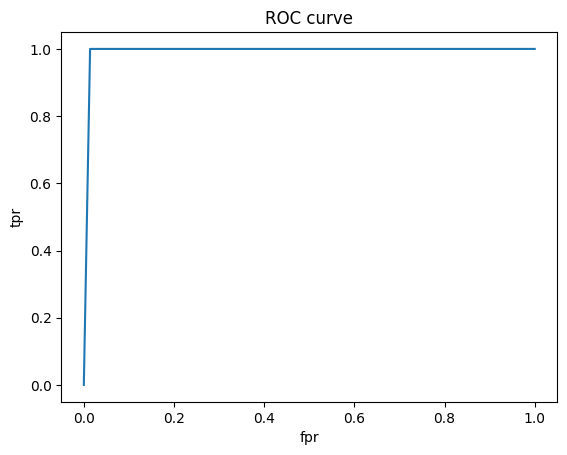

In [23]:
#ROC curve와 AUC 
from sklearn.metrics import roc_curve, roc_auc_score
pred_proba = model.predict_proba(x_test)
#pred_proba

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

# AUC
auc = roc_auc_score(y_test, pred_proba[:, 1])
print(f'AUC: {auc:.4f}')

# 모델의 학습 결과

In [24]:
df.loc[df['Launched?']=='Y'][['Temp at Launch Time','Launched?']].sort_values('Temp at Launch Time')

,Temp at Launch Time,Launched?
172,50.000000,Y
197,52.000000,Y
22,53.000000,Y
17,54.000000,Y
37,54.000000,Y
47,60.000000,Y
67,62.000000,Y
2,62.000000,Y
82,63.000000,Y
167,65.000000,Y


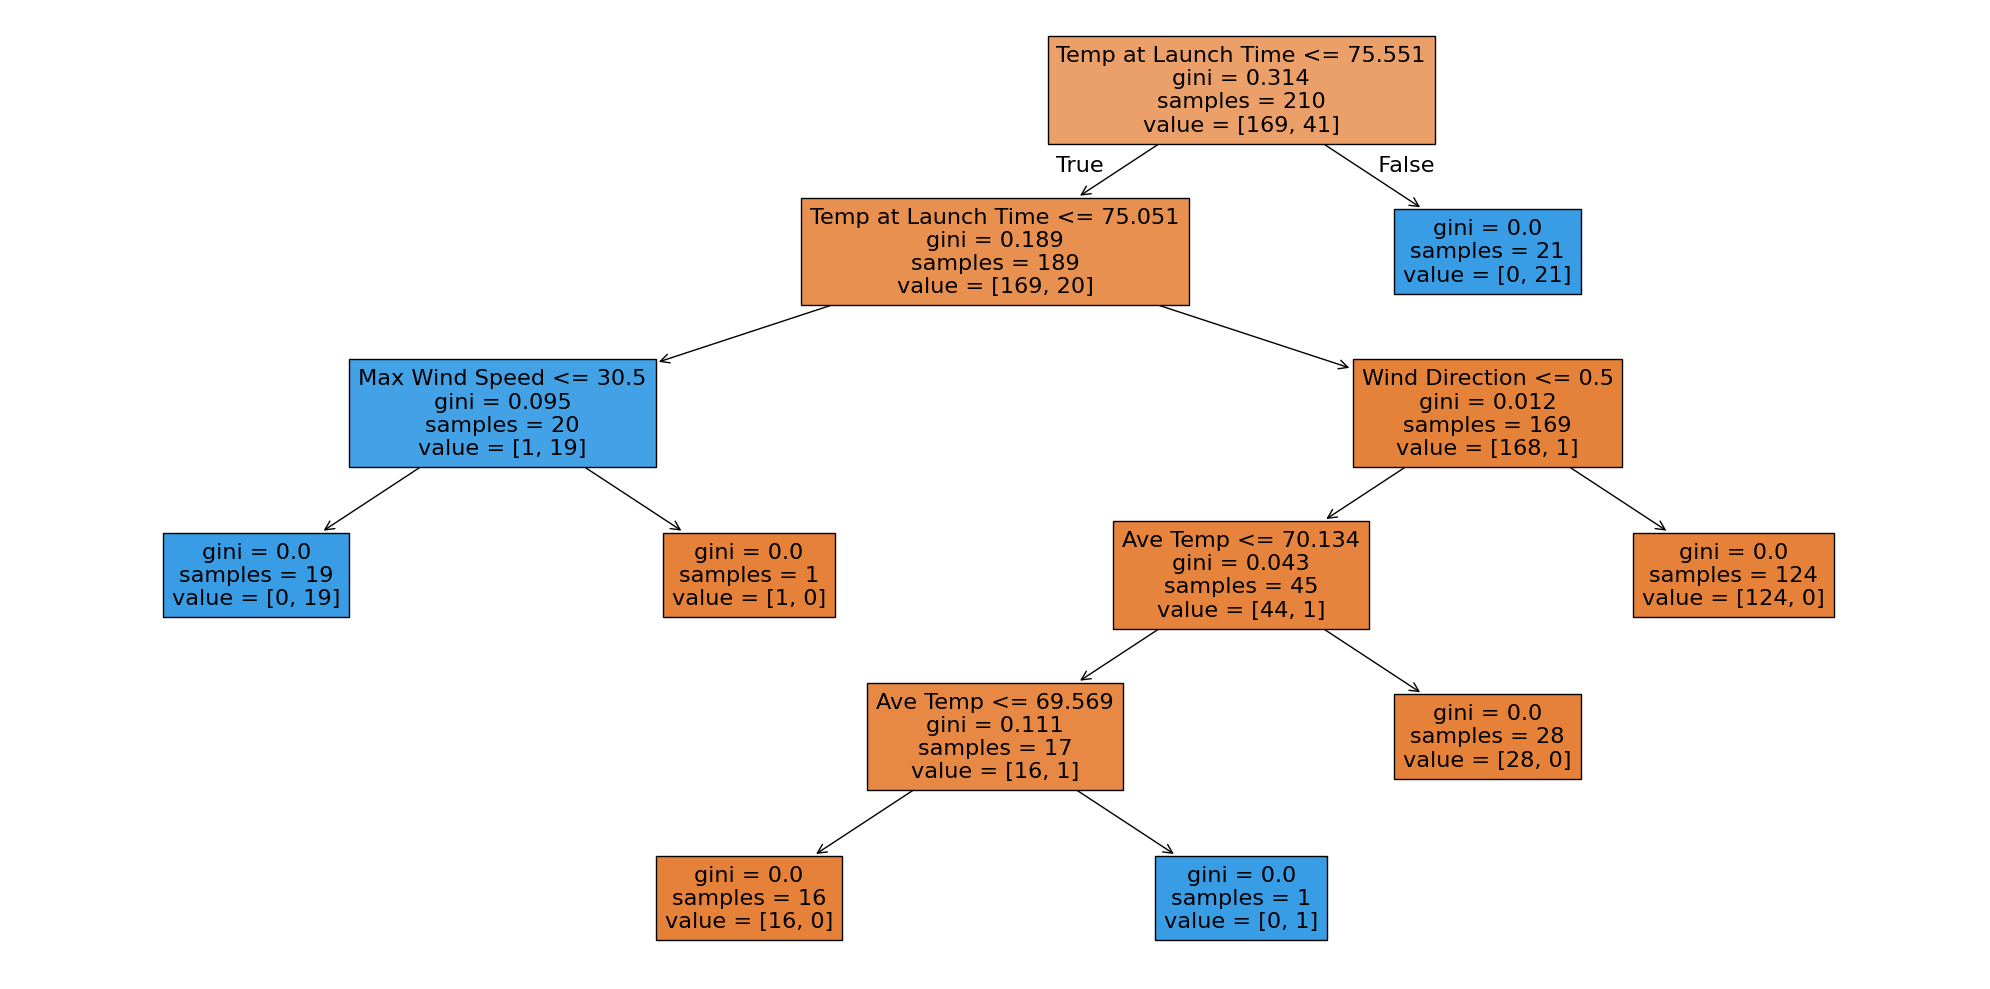

In [25]:
# 시각화
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, filled=True)
plt.tight_layout()

In [26]:
# 트리의 깊이
model.get_depth()

5

특성의 중요도 >>> [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.96339058e-02 9.41079897e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.94164110e-04 2.87920335e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


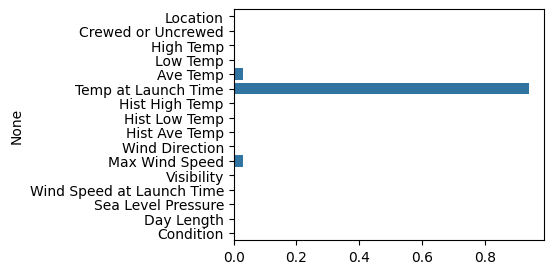

In [27]:
# 특성의 중요도
print(f'특성의 중요도 >>> {model.feature_importances_}')
plt.figure(figsize=(4,3))
sns.barplot(y=x.columns, x=model.feature_importances_)
plt.show()

# 변수 재선택

Temp at Launch Time과 Wind speed at Launch Time을 제거

In [28]:
x = x.drop(['Wind Speed at Launch Time','Temp at Launch Time', 'Crewed or Uncrewed'], axis=1)

In [29]:
from sklearn.metrics import confusion_matrix


# 데이터 세트 분할할
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# 모델 지정 및 훈련
model = DecisionTreeClassifier(random_state=42, max_depth=4)
#model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

# 평가
# 테스트 세트
print(f'test>>{classification_report(y_test, pred_test)}')

print(confusion_matrix(y_test, pred_test))

# 훈련세트
print(f'train>>{classification_report(y_train, pred_train)}')

test>>              precision    recall  f1-score   support

           0       0.79      0.93      0.85        60
           1       0.00      0.00      0.00        15

    accuracy                           0.75        75
   macro avg       0.39      0.47      0.43        75
weighted avg       0.63      0.75      0.68        75

[[56  4]
 [15  0]]
train>>              precision    recall  f1-score   support

           0       0.84      1.00      0.91       181
           1       1.00      0.20      0.34        44

    accuracy                           0.84       225
   macro avg       0.92      0.60      0.63       225
weighted avg       0.87      0.84      0.80       225



훈련 세트에 비해 테스트 세트의 정확도가 너무 떨어지면 과적합

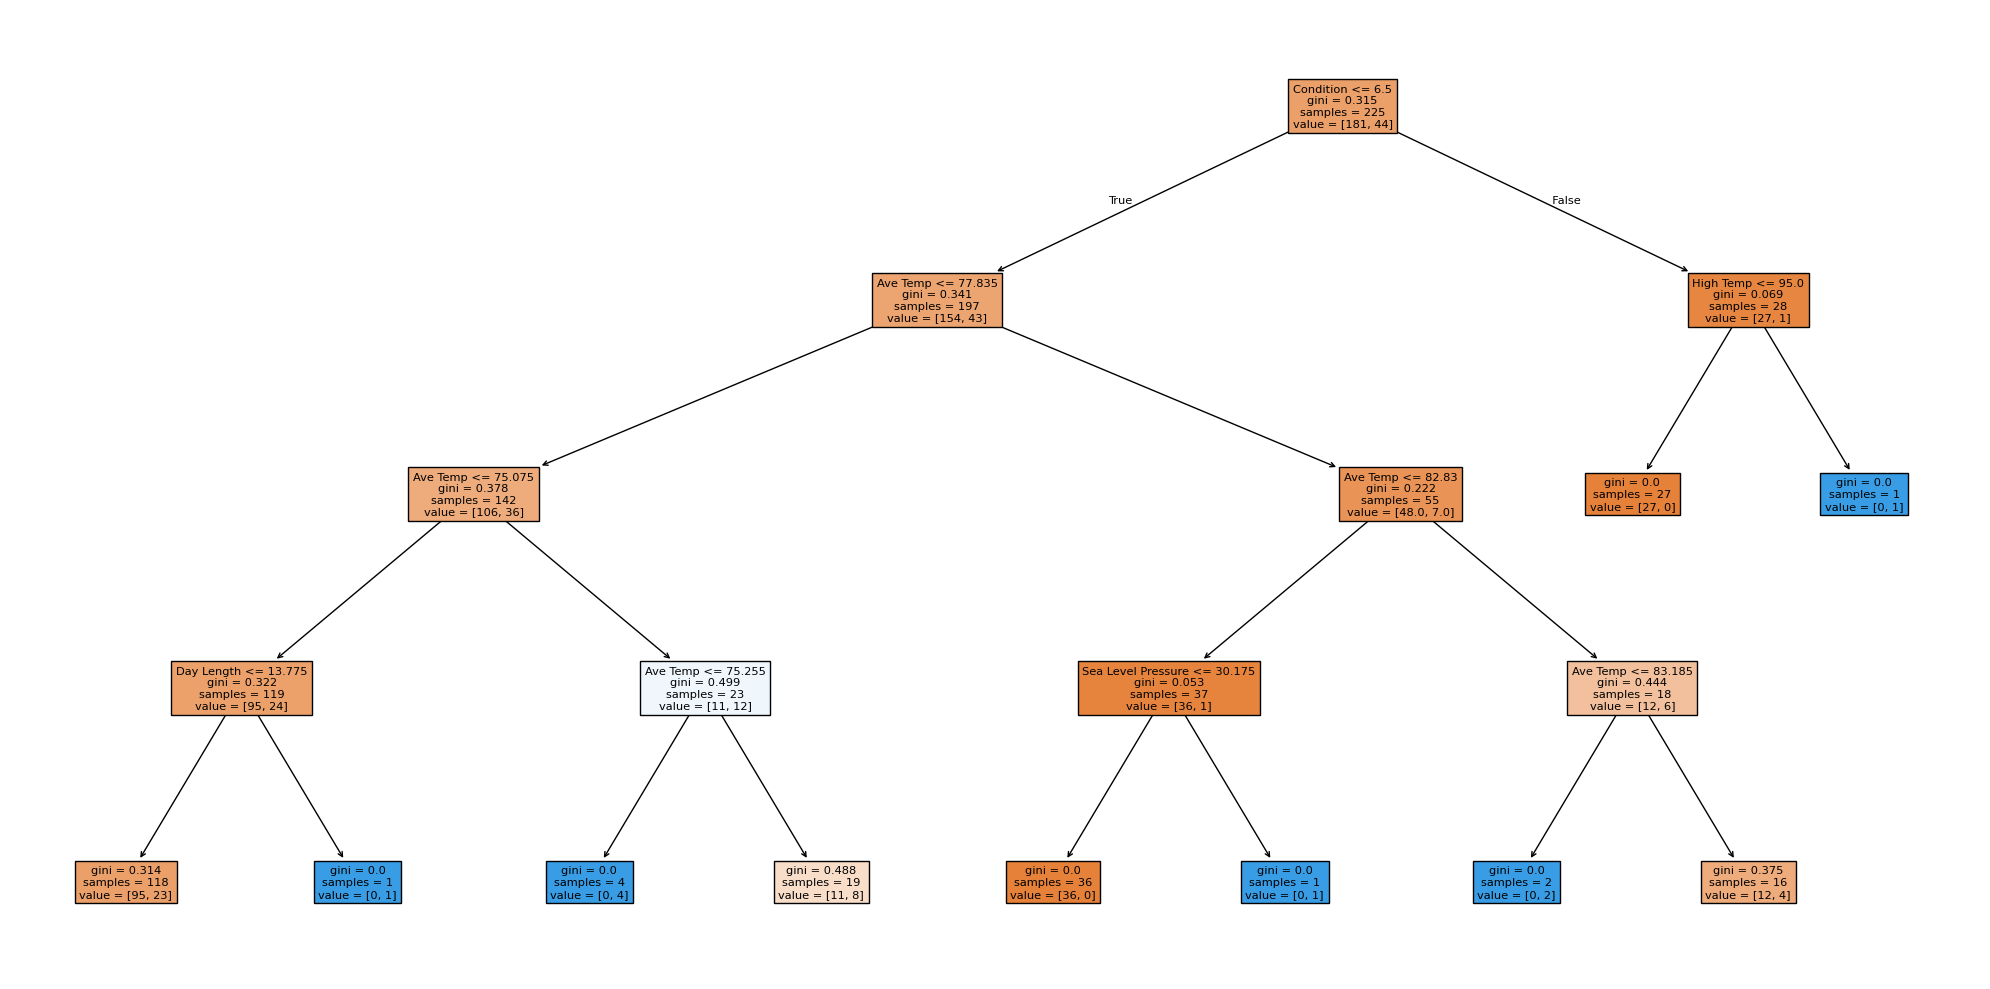

In [30]:
# 시각화
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, filled=True)
plt.tight_layout()

In [31]:
# 트리의 깊이
model.get_depth()

4

# 불균형 데이터 처리

In [32]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [33]:
# 오버샘플링

from imblearn.over_sampling import RandomOverSampler

# 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
print(x_train_resampled.shape, y_train_resampled.shape)
print(y_train_resampled.value_counts())

(362, 13) (362,)
Launched?
1    181
0    181
Name: count, dtype: int64


In [34]:
model = DecisionTreeClassifier(random_state=42, max_depth=11)
model.fit(x_train_resampled, y_train_resampled)
pred_test = model.predict(x_test)
pred_train = model.predict(x_train)
print(classification_report(y_test, pred_test))
print(classification_report(y_train, pred_train))
 

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        60
           1       0.17      0.27      0.21        15

    accuracy                           0.60        75
   macro avg       0.48      0.47      0.47        75
weighted avg       0.67      0.60      0.63        75

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       181
           1       0.83      1.00      0.91        44

    accuracy                           0.96       225
   macro avg       0.92      0.98      0.94       225
weighted avg       0.97      0.96      0.96       225



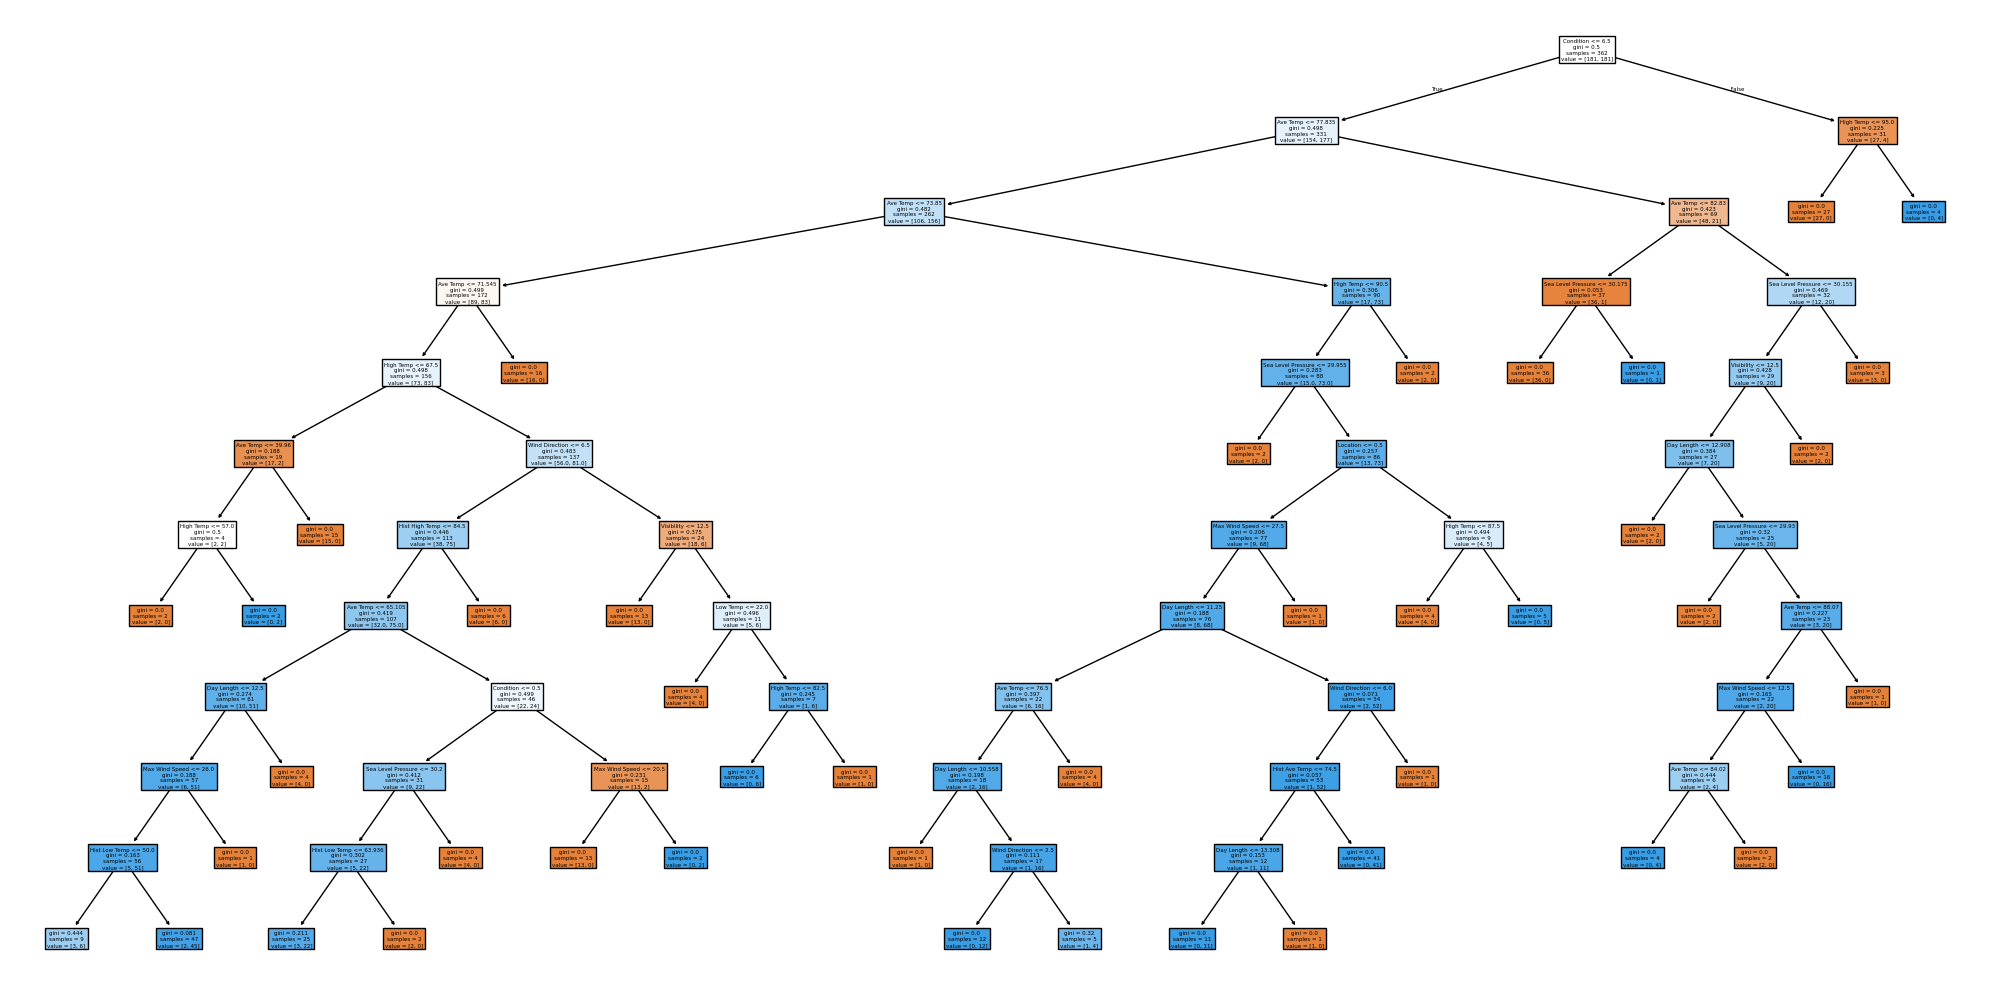

In [35]:
# 시각화
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, filled=True)
plt.tight_layout()

In [36]:
# 트리의 깊이
model.get_depth()

11

## GridSearchCV로 최적의 depth 찾기

In [37]:
model = DecisionTreeClassifier()

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True) # 5겹 교차검증

# 하이퍼 파라미터 준비
# min_samples_split은 노드가 분할되기 위해 필요한 최소 샘플 수
parameters = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

# GridSearchCV
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(model, param_grid=parameters, cv=kf, refit = True)
gscv.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13]})

In [38]:
display(pd.DataFrame(gscv.cv_results_))
print(f'최적의 파라미터: {gscv.best_params_}')
print(f'최고의 정확도: {gscv.best_score_}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003899,0.000657,0.002487,0.000508,1,{'max_depth': 1},0.506849,0.534247,0.583333,0.569444,0.527778,0.544330,0.028044,13
1,0.002844,0.000244,0.001609,0.000254,2,{'max_depth': 2},0.561644,0.726027,0.680556,0.625000,0.611111,0.640868,0.056993,11
2,0.002333,0.000759,0.002228,0.002083,3,{'max_depth': 3},0.712329,0.547945,0.611111,0.652778,0.597222,0.624277,0.055312,12
3,0.001718,0.000255,0.000829,0.000070,4,{'max_depth': 4},0.671233,0.630137,0.708333,0.763889,0.597222,0.674163,0.058455,10
4,0.002776,0.000715,0.001122,0.000240,5,{'max_depth': 5},0.684932,0.671233,0.708333,0.763889,0.708333,0.707344,0.031641,9
5,0.002159,0.000414,0.001079,0.000284,6,{'max_depth': 6},0.657534,0.753425,0.763889,0.791667,0.680556,0.729414,0.051370,8
6,0.002262,0.000313,0.001195,0.000073,7,{'max_depth': 7},0.726027,0.780822,0.750000,0.819444,0.777778,0.770814,0.031473,7
7,0.002205,0.000435,0.000950,0.000332,8,{'max_depth': 8},0.794521,0.863014,0.777778,0.875000,0.722222,0.806507,0.056493,6
8,0.002203,0.000377,0.000849,0.000137,9,{'max_depth': 9},0.767123,0.849315,0.777778,0.861111,0.791667,0.809399,0.038390,5
9,0.002029,0.000268,0.000832,0.000136,10,{'max_depth': 10},0.780822,0.849315,0.763889,0.888889,0.833333,0.823250,0.045636,4


최적의 파라미터: {'max_depth': 12}
최고의 정확도: 0.8536910197869101


## 최종 모델

In [40]:
model = DecisionTreeClassifier(random_state=42, max_depth=12)
model.fit(x_train_resampled, y_train_resampled)
pred_test = model.predict(x_test)
pred_train = model.predict(x_train)
print(classification_report(y_test, pred_test))
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        60
           1       0.22      0.33      0.26        15

    accuracy                           0.63        75
   macro avg       0.51      0.52      0.51        75
weighted avg       0.69      0.63      0.65        75

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       181
           1       0.92      1.00      0.96        44

    accuracy                           0.98       225
   macro avg       0.96      0.99      0.97       225
weighted avg       0.98      0.98      0.98       225



# 다른 모델 적용